In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [49]:
df = pd.read_csv("customers_subset_2.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,y
0,10476,1958,Graduation,Married,67267.0,0,1,13-05-2014,0,134,...,2,0,0,0,0,0,0,3,11,0
1,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,0
2,10356,1957,PhD,Divorced,41437.0,1,1,22-09-2012,5,29,...,7,0,0,0,0,0,0,3,11,0
3,1175,1983,Master,Married,36262.0,0,0,20-09-2013,24,88,...,6,1,0,0,0,0,0,3,11,1
4,6404,1969,Graduation,Together,58917.0,1,2,24-03-2013,10,151,...,5,0,0,0,0,0,0,3,11,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1100 non-null   int64  
 1   Year_Birth           1100 non-null   int64  
 2   Education            1100 non-null   object 
 3   Marital_Status       1100 non-null   object 
 4   Income               1087 non-null   float64
 5   Kidhome              1100 non-null   int64  
 6   Teenhome             1100 non-null   int64  
 7   Dt_Customer          1100 non-null   object 
 8   Recency              1100 non-null   int64  
 9   MntWines             1100 non-null   int64  
 10  MntFruits            1100 non-null   int64  
 11  MntMeatProducts      1100 non-null   int64  
 12  MntFishProducts      1100 non-null   int64  
 13  MntSweetProducts     1100 non-null   int64  
 14  MntGoldProds         1100 non-null   int64  
 15  NumDealsPurchases    1100 non-null   i

In [51]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,y
count,1100.000000,1100.000000,1087.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,1100.0,1100.000000
mean,5496.078182,1968.559091,53059.596136,0.457273,0.504545,49.440000,307.833636,26.747273,173.530000,38.634545,...,5.274545,0.081818,0.077273,0.079091,0.071818,0.016364,0.006364,3.0,11.0,0.148182
std,3199.678399,12.050136,28624.605545,0.553746,0.540429,28.920729,342.128562,40.708933,230.643492,55.695888,...,2.430674,0.274212,0.267145,0.270003,0.258304,0.126927,0.079554,0.0,0.0,0.355442
min,0.000000,1899.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2804.750000,1959.000000,35661.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5332.500000,1970.000000,52278.000000,0.000000,0.000000,51.000000,176.000000,8.000000,69.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8204.750000,1977.000000,69673.000000,1.000000,1.000000,73.250000,502.500000,34.000000,249.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1492.000000,199.000000,1622.000000,258.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [52]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 13
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
y                       0
dtype: int64

In [53]:
df.dropna(subset="Income", axis=0, inplace=True )

In [54]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
y                      0
dtype: int64

In [55]:
df["Age"] = 2023- df["Year_Birth"]
df["Age"].head()

0    65
1    50
2    66
3    40
4    54
Name: Age, dtype: int64

In [56]:
df = df[["Age", "Income", "y"]]
df.head()

,Age,Income,y
0,65,67267.0,0
1,50,48432.0,0
2,66,41437.0,0
3,40,36262.0,1
4,54,58917.0,0


In [57]:
df.isnull().sum()

Age       0
Income    0
y         0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1087 non-null   int64  
 1   Income  1087 non-null   float64
 2   y       1087 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 34.0 KB


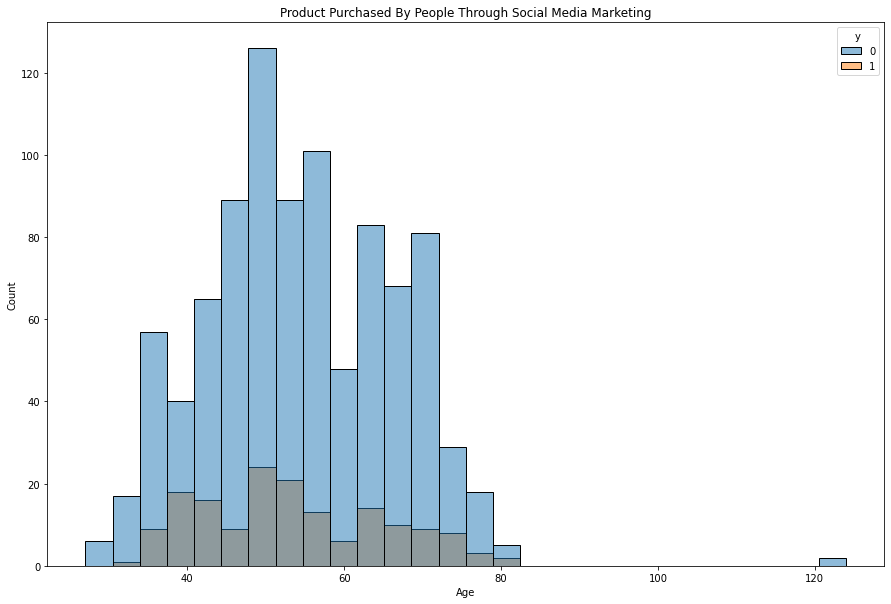

In [59]:
plt.figure(figsize=(15,10))
plt.title("Product Purchased By People Through Social Media Marketing")
sns.histplot(x="Age", hue="y", data=df)
plt.show()

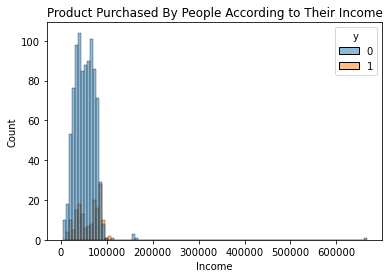

In [60]:
plt.title("Product Purchased By People According to Their Income")
sns.histplot(data=df, x="Income", hue="y")
plt.show()

In [61]:
X = np.array(df[["Age", "Income"]])
y = np.array(df[["y"]])


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions =model.predict(X_test)

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       188
           1       0.14      0.20      0.17        30

    accuracy                           0.72       218
   macro avg       0.50      0.50      0.50       218
weighted avg       0.76      0.72      0.74       218

